In [2]:
import crystals
import numpy as np
import matplotlib.pyplot as plt

In [3]:
albite = crystals.Crystal.from_cif('../data/2107372_albite_4.cif')

In [4]:
atoms = sorted(albite)
atoms[0].coords_cartesian

array([ 0.03493581, 10.38846727,  0.83325887])

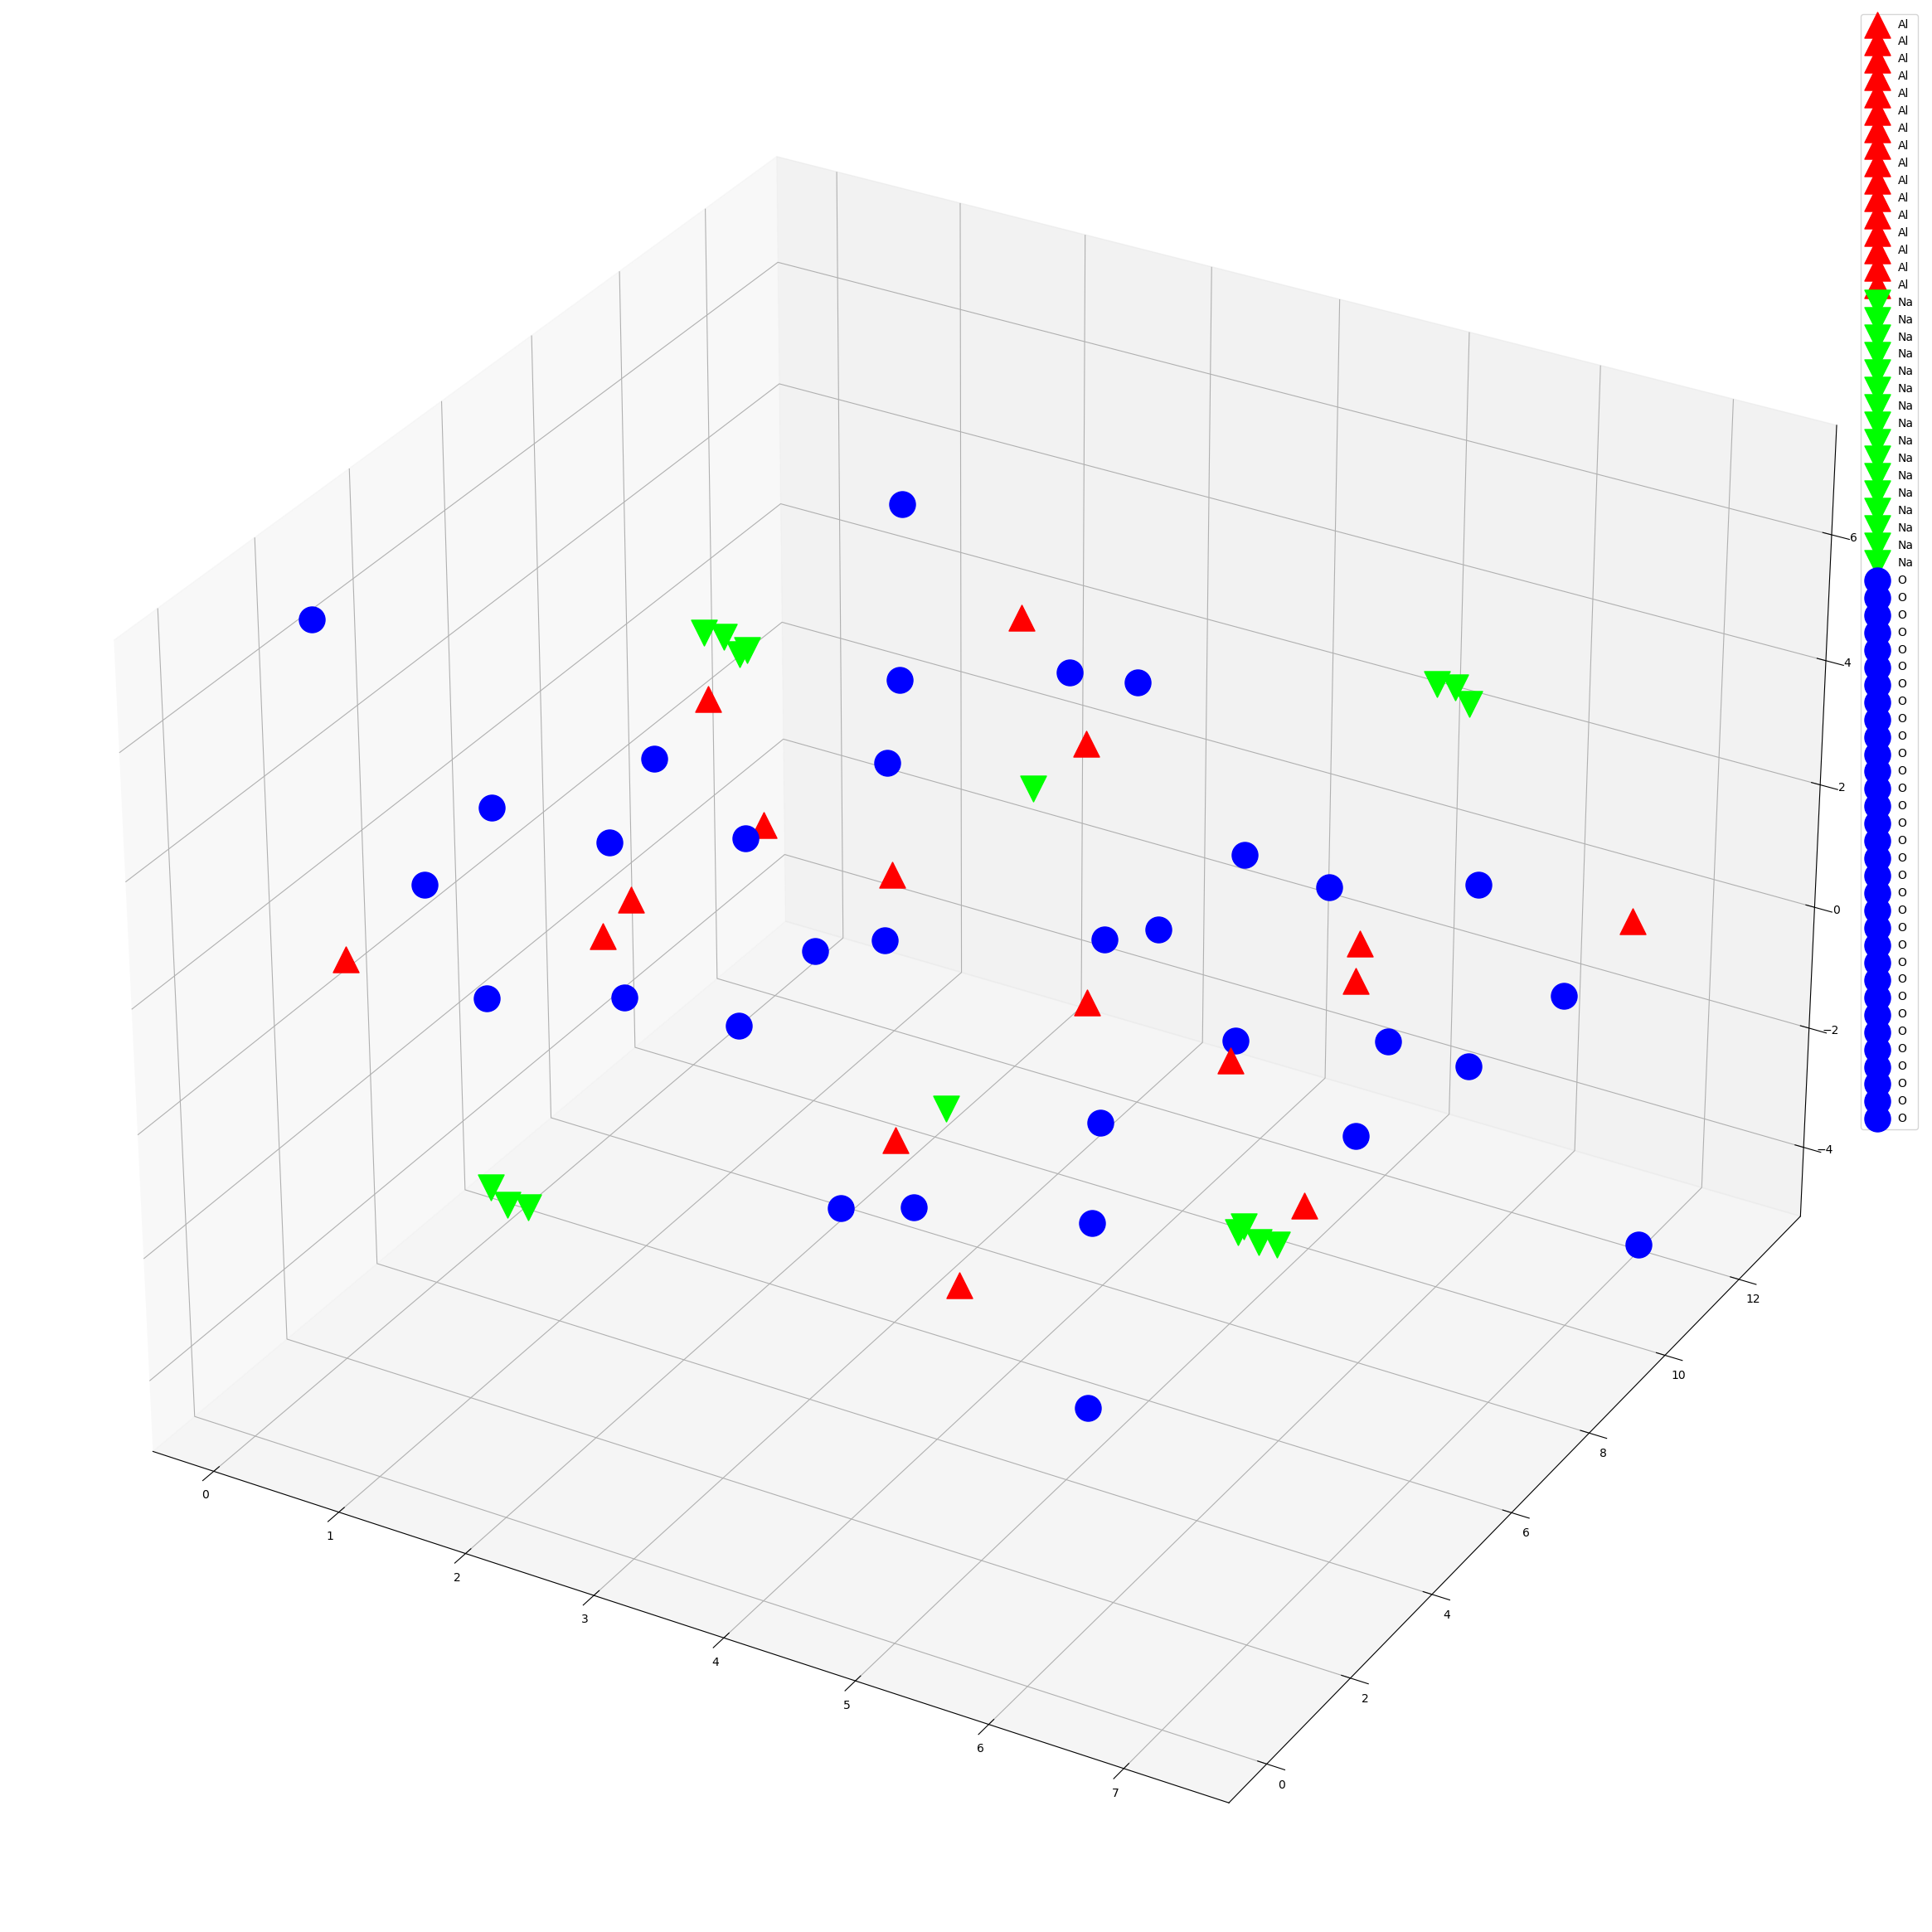

In [5]:
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(projection='3d')

markers = { 'Al': '^', 'O': 'o', 'Na': 'v', 'Si': 's' }
colors  = { 'Al': '#ff0000', 'O': '#0000ff', 'Na': '#00ff00', 'Si': '#000000' }

for atom in atoms:
    if atom.symbol == 'Si':
        continue
    ax.scatter(*atom.coords_cartesian, marker=markers[atom.symbol], s=500, c=colors[atom.symbol], label=atom.symbol)

plt.legend()

plt.show()

In [6]:
dist = crystals.distance_cartesian

In [65]:
other_atoms = [ a for a in sorted(albite.supercell(3, 3, 3)) ]
al_atoms = [ a for a in sorted(albite.supercell(3,3,3)) if a.symbol == 'Al' and 1 <= a.coords_fractional[0] <= 2 and 1 <= a.coords_fractional[1] <= 2 and 1 <= a.coords_fractional[2] <= 2 ]

In [112]:
def all_atoms(crystal):
    return [ a for a in sorted(crystal.supercell(3, 3, 3)) ]


def int_atoms(crystal, which='Al'):
    is_in_middle = lambda x: 1 <= x[0] <= 2 and 1 <= x[1] <= 2 and 1 <= x[2] <= 2

    return [ a for a in sorted(crystal.supercell(3, 3, 3)) if a.symbol == which and is_in_middle(a.coords_fractional) ]


def lowest_distances(atom, atoms_other):
    names_other = [ a.symbol for a in atoms_other ]
    distances = [ crystals.distance_cartesian(atom, o) for o in atoms_other if crystals.distance_cartesian(atom, o) != 0. ]

    return sorted(zip(names_other, distances), key=lambda x: x[1])[:]


def coordination(distances):
    distances = [ x[1] for x in distances ]
    limit = min(distances) * 1.08

    return len([ d for d in distances if d < limit])

In [113]:
[ coordination(lowest_distances(al, all_atoms(albite))) for al in int_atoms(albite) ]

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [80]:
corundum = crystals.Crystal.from_cif('../data/1010914_corundum_6.cif')

In [114]:
[ coordination(lowest_distances(al, all_atoms(corundum))) for al in int_atoms(corundum) ]

[6, 6, 6, 6]

In [115]:
lowest_distances(int_atoms(corundum)[0], all_atoms(corundum))

[('O', 1.8428604328425382),
 ('O', 1.8428604328425384),
 ('O', 1.8428604328425386),
 ('O', 1.9815601626690518),
 ('O', 1.9815601626690535),
 ('O', 1.981560162669054),
 ('Al', 2.7237595814493702),
 ('Al', 2.7996904150807658),
 ('Al', 2.7996904150807667),
 ('Al', 2.7996904150807684),
 ('Al', 3.17510785397963),
 ('Al', 3.1751078539796302),
 ('Al', 3.1751078539796307),
 ('O', 3.1990576634875443),
 ('O', 3.1990576634875465),
 ('O', 3.199057663487548),
 ('O', 3.395168203834403),
 ('O', 3.395168203834404),
 ('O', 3.3951682038344044),
 ('Al', 3.4921881892768782),
 ('Al', 3.4921881892768782),
 ('Al', 3.4921881892768787),
 ('Al', 3.4921881892768787),
 ('Al', 3.49218818927688),
 ('Al', 3.4921881892768805),
 ('O', 3.580226718632926),
 ('O', 3.580226718632927),
 ('O', 3.5802267186329275),
 ('Al', 3.761382279144367),
 ('O', 3.8951396331201837),
 ('O', 3.8951396331201846),
 ('O', 3.8951396331201855),
 ('O', 4.131804120925896),
 ('O', 4.131804120925896),
 ('O', 4.1318041209258975),
 ('O', 4.2854407581

In [86]:
int_atoms(corundum)[0].lattice

< Lattice object with parameters 5.120Å, 5.120Å, 5.120Å, 55.28°, 55.28°, 55.28° >

In [91]:
[ crystals.distance_cartesian(x, int_atoms(corundum)[0]) for x in all_atoms(corundum) ]

[12.970283721187476,
 9.07141039765594,
 6.98437637855376,
 9.071410397655939,
 5.120000000000001,
 4.75048559594698,
 6.984376378553757,
 4.750485595946979,
 6.98437637855376,
 10.246524139738108,
 6.527284283219884,
 5.713879879880472,
 6.527284283219882,
 3.1751078539796307,
 5.475945548929151,
 5.713879879880468,
 5.47594554892915,
 8.930416341244742,
 6.485141860593738,
 3.4921881892768805,
 5.895972502193734,
 3.4921881892768782,
 3.4921881892768782,
 8.038916491003308,
 5.895972502193735,
 8.03891649100331,
 12.120835984041085,
 3.761382279144367,
 2.7996904150807684,
 7.345565750214816,
 2.7996904150807658,
 5.602697813859786,
 10.361996871576606,
 7.345565750214819,
 10.361996871576606,
 14.601829410810065,
 9.071410397655939,
 5.120000000000001,
 4.75048559594698,
 5.119999999999999,
 0.0,
 5.120000000000001,
 4.7504855959469765,
 5.12,
 9.071410397655944,
 6.527284283219883,
 3.1751078539796302,
 5.475945548929151,
 3.17510785397963,
 2.7237595814493702,
 7.562091154612683,


In [81]:
[ coordination(lowest_distances(al, all_atoms(corundum))) for al in int_atoms(corundum) ]

RuntimeError: Distance is undefined if atoms are sitting on different lattices.

In [84]:
[ x.lattice == all_atoms(corundum)[0].lattice for x in all_atoms(corundum) ]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,

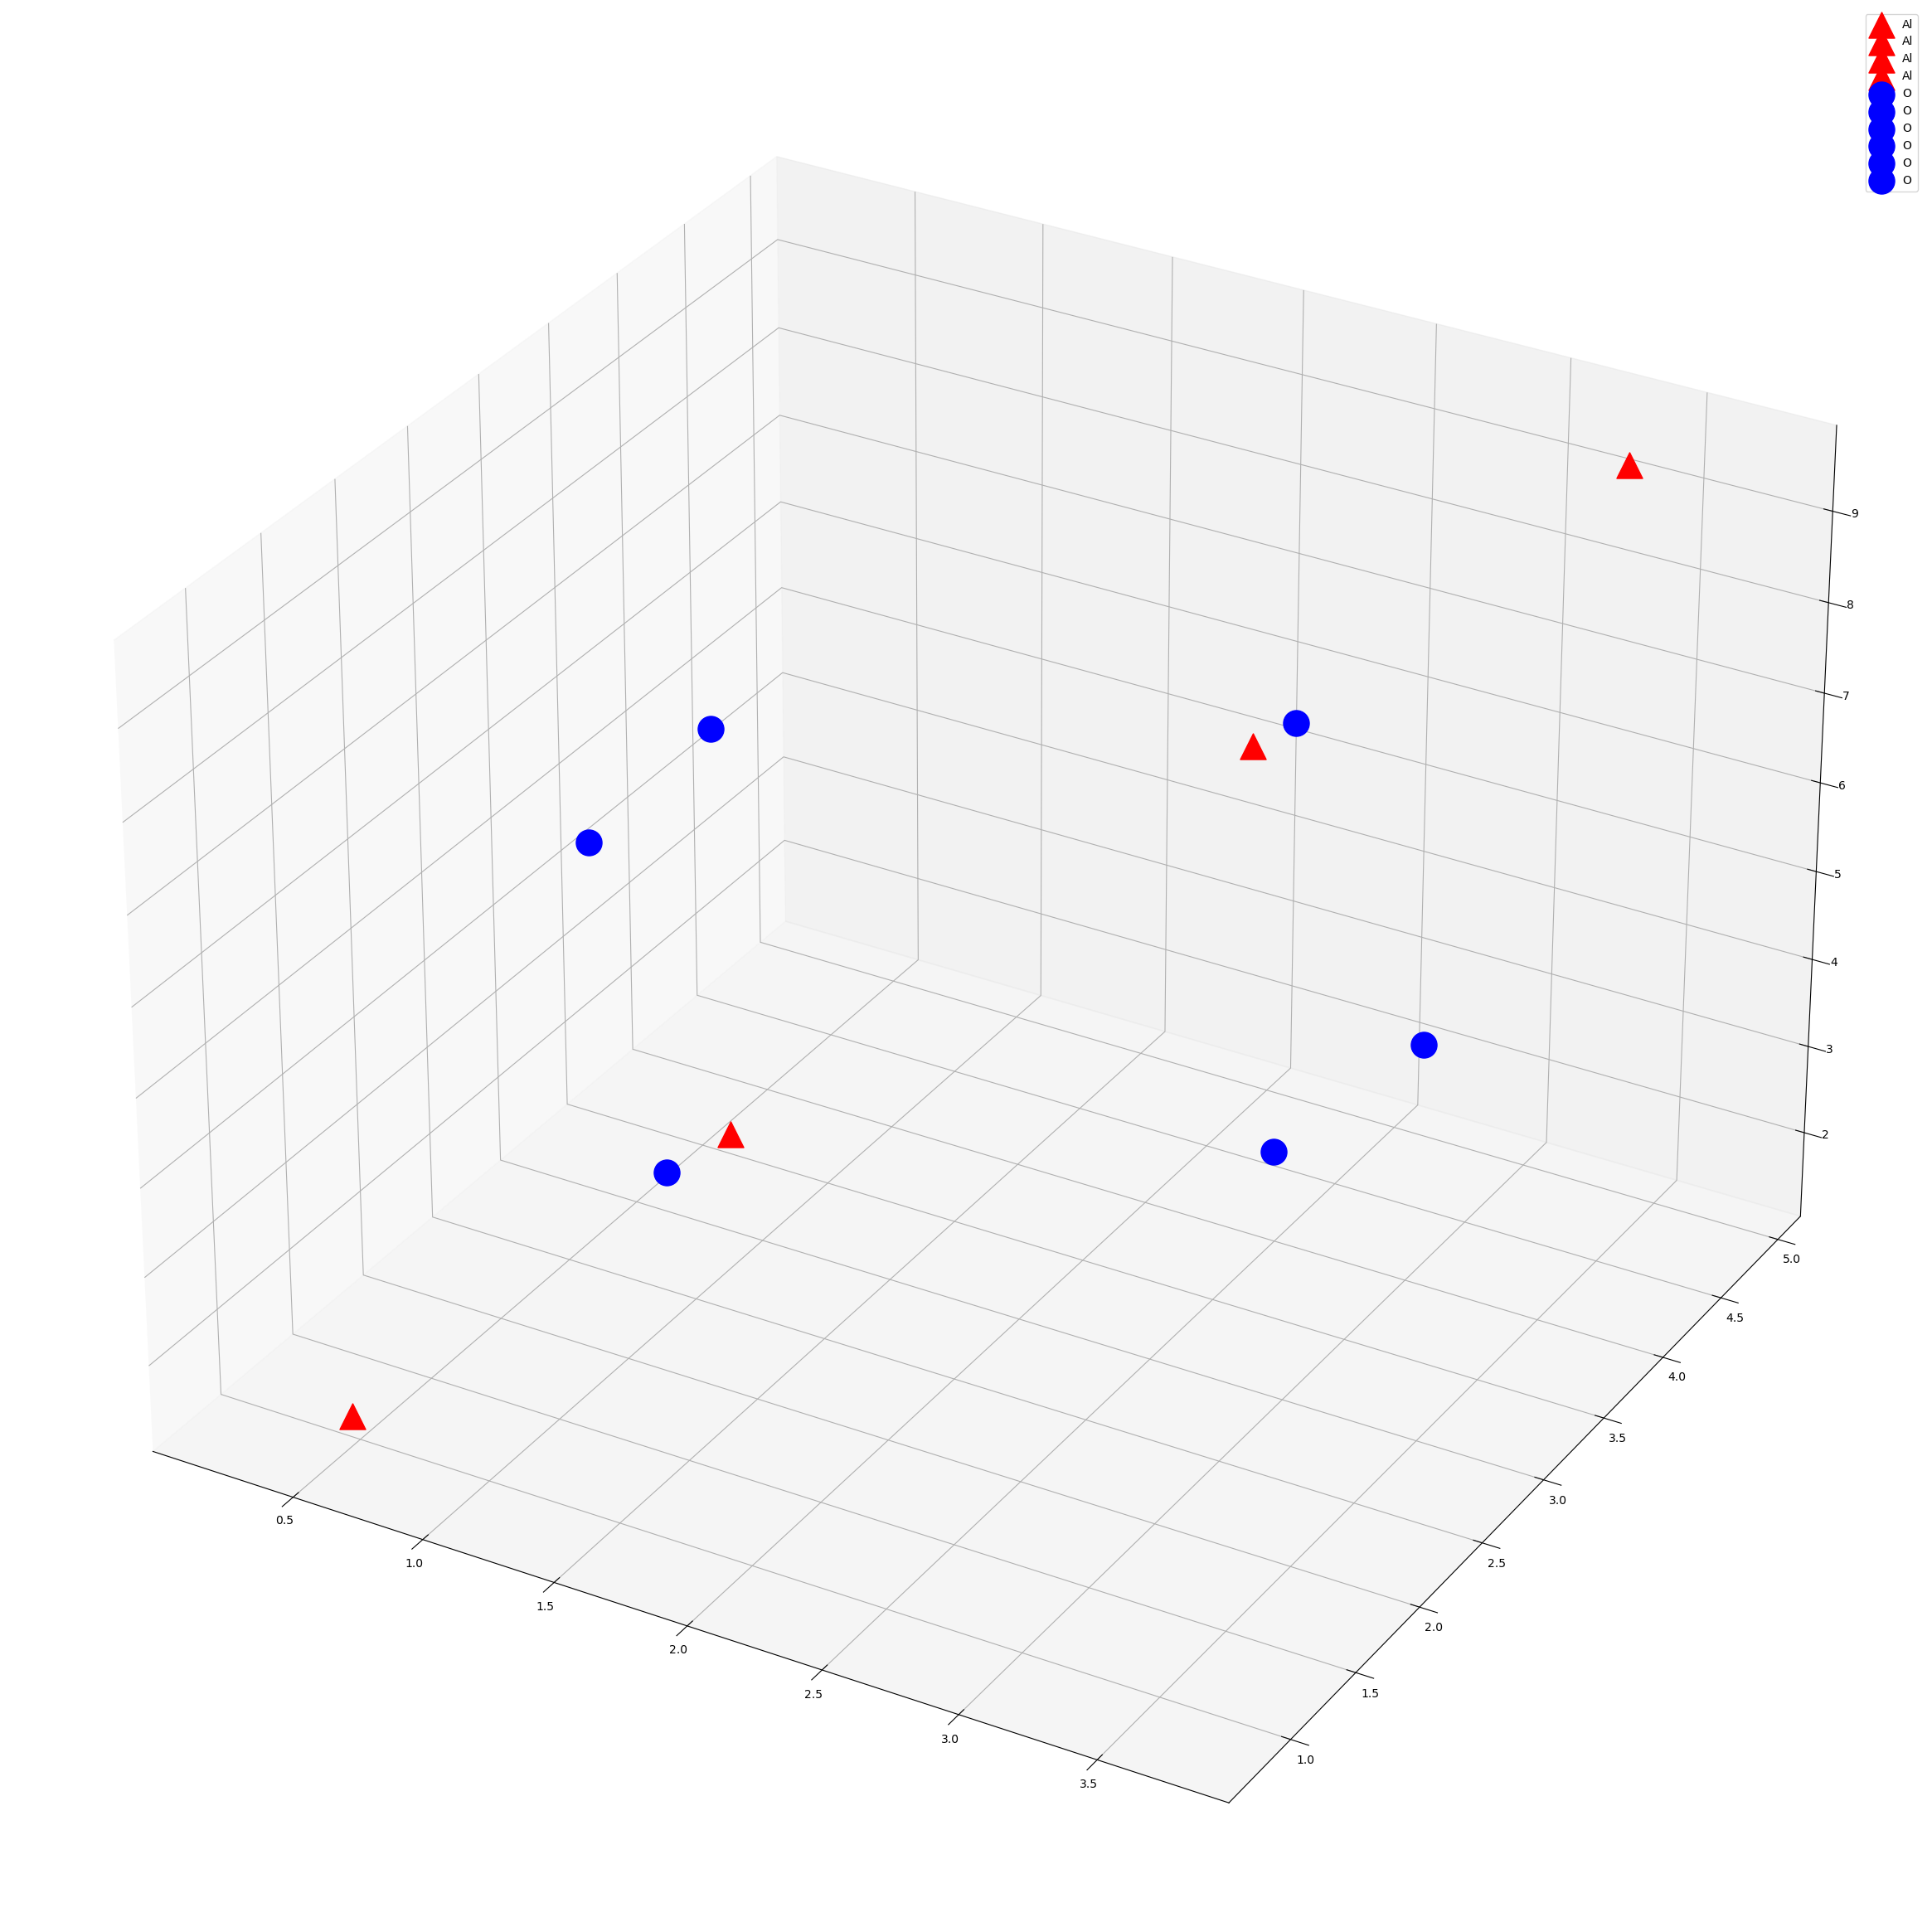

In [76]:
fig = plt.figure(figsize=(30, 30))
ax = fig.add_subplot(projection='3d')

markers = { 'Al': '^', 'O': 'o', 'Na': 'v', 'Si': 's' }
colors  = { 'Al': '#ff0000', 'O': '#0000ff', 'Na': '#00ff00', 'Si': '#000000' }

for atom in sorted(corundum):
    if atom.symbol == 'Si':
        continue
    ax.scatter(*atom.coords_cartesian, marker=markers[atom.symbol], s=500, c=colors[atom.symbol], label=atom.symbol)

plt.legend()

plt.show()